### Configuración del ambiente

In [ ]:
# @title
# Importe de bibliotecas
import random
import datetime
import operator
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
from datetime import datetime
import ipywidgets as widgets
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import display, clear_output
from google.colab import drive

In [ ]:
# Conectar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cargar bases de datos

### Base de datos Eventos-Trafos

In [ ]:
# @title
# Cargar bases de datos de eventos
eventos_trafos = pd.read_csv('/content/drive/Shareddrives/CHEC/data_chec/datos/Data_Total/EVENTOS_TRAFOS.csv')

eventos_trafos['inicio'] = pd.to_datetime(eventos_trafos['inicio']).dt.normalize()
eventos_trafos['fin'] = pd.to_datetime(eventos_trafos['fin']).dt.normalize()
eventos_trafos['DATE_FAB'] = pd.to_datetime(eventos_trafos['DATE_FAB'], format='%Y-%m-%d', errors='coerce').dt.normalize()
eventos_trafos['inicio_m'] = pd.to_datetime(eventos_trafos['inicio_m']).dt.to_period('M')
eventos_trafos['fin_m'] = pd.to_datetime(eventos_trafos['fin_m']).dt.to_period('M')
eventos_trafos['FECHA'] = pd.to_datetime(eventos_trafos['FECHA']).dt.to_period('M')
eventos_trafos['FECHA_ACT'] = pd.to_datetime(eventos_trafos['FECHA_ACT'], format='%Y-%m-%d', errors='coerce').dt.normalize()
eventos_trafos[['duracion_h','CNT_TRAFOS_AFEC','cnt_usus','SAIDI','SAIFI','PHASES','XPOS','YPOS','Z*','R','G','B','IMPEDANCE*','GRUPO015','KVA','KV1']] = eventos_trafos[['duracion_h','CNT_TRAFOS_AFEC','cnt_usus','SAIDI','SAIFI','PHASES','XPOS','YPOS','Z*','R','G','B','IMPEDANCE*','GRUPO015','KVA','KV1']].astype('float32')
eventos_trafos[['evento','equipo_ope','tipo_equi_ope','cto_equi_ope','CODE','FPARENT*','TRFTYPE','ELNODE','CASO*']] = eventos_trafos[['evento','equipo_ope','tipo_equi_ope','cto_equi_ope','CODE','FPARENT*','TRFTYPE','ELNODE','CASO*']].astype('string')

# Crear un DataFrame con columnas, tipos de datos y valores nulos
info = pd.concat([eventos_trafos.dtypes.astype(str), eventos_trafos.isnull().sum()], axis=1, keys=['Tipo de Dato', 'Valores Nulos'])

# Formatear la salida
for col, dtype, nulls in zip(info.index, info['Tipo de Dato'], info['Valores Nulos']):
    print(f"{col:<12} {dtype:<10} {nulls}")

# Lista de columnas a excluir
columnas_a_excluir = ['tipo_equi_ope','XPOS','YPOS','Z*','R','G','B','']

# Obtener todas las columnas excepto las de la lista de exclusión
eventos_trafos_columnas = [col for col in eventos_trafos.columns if col not in columnas_a_excluir]

eventos_trafos

### Base de datos Eventos-Switches

In [ ]:
# @title
# Cargar bases de datos de eventos
eventos_switches = pd.read_csv('/content/drive/Shareddrives/CHEC/data_chec/datos/Data_Total/EVENTOS_SWITCHES.csv')

eventos_switches['inicio'] = pd.to_datetime(eventos_switches['inicio']).dt.normalize()
eventos_switches['fin'] = pd.to_datetime(eventos_switches['fin']).dt.normalize()
eventos_switches['inicio_m'] = pd.to_datetime(eventos_switches['inicio_m']).dt.to_period('M')
eventos_switches['fin_m'] = pd.to_datetime(eventos_switches['fin_m']).dt.to_period('M')
eventos_switches['FECHA'] = pd.to_datetime(eventos_switches['FECHA']).dt.to_period('M')
eventos_switches[['duracion_h','CNT_TRAFOS_AFEC','cnt_usus','SAIDI','SAIFI','PHASES','XPOS','YPOS','KV']] = eventos_switches[['duracion_h','CNT_TRAFOS_AFEC','cnt_usus','SAIDI','SAIFI','PHASES','XPOS','YPOS','KV']].astype('float32')
eventos_switches[['evento','equipo_ope']] = eventos_switches[['evento','equipo_ope']].astype('string')

# Crear un DataFrame con columnas, tipos de datos y valores nulos
info = pd.concat([eventos_switches.dtypes.astype(str), eventos_switches.isnull().sum()], axis=1, keys=['Tipo de Dato', 'Valores Nulos'])

# Formatear la salida
for col, dtype, nulls in zip(info.index, info['Tipo de Dato'], info['Valores Nulos']):
    print(f"{col:<12} {dtype:<10} {nulls}")

# Lista de columnas a excluir
columnas_a_excluir = ['tipo_equi_ope','XPOS','YPOS']

# Obtener todas las columnas excepto las de la lista de exclusión
eventos_switches_columnas = [col for col in eventos_switches.columns if col not in columnas_a_excluir]

eventos_switches

evento       string     0
equipo_ope   string     0
tipo_equi_ope object     0
cto_equi_ope object     0
tipo_elemento object     0
inicio       datetime64[ns] 0
fin          datetime64[ns] 0
duracion_h   float32    0
tipo_duracion object     0
causa*       object     286
CNT_TRAFOS_AFEC float32    0
cnt_usus     float32    0
SAIDI        float32    0
SAIFI        float32    0
inicio_m     period[M]  0
fin_m        period[M]  0
CODE         object     306
ASSEMBLY*    object     306
PHASES       float32    306
FPARENT*     object     349
XPOS         float32    306
YPOS         float32    306
KV           float32    306
STATE        object     306
LINESECTIO   object     306
FECHA        period[M]  306


,evento,equipo_ope,tipo_equi_ope,cto_equi_ope,tipo_elemento,inicio,fin,duracion_h,tipo_duracion,causa*,...,CODE,ASSEMBLY*,PHASES,FPARENT*,XPOS,YPOS,KV,STATE,LINESECTIO,FECHA
0,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01,2019-01-01,1.030000,> 3 min,Falla en postes y/o crucetas en el SDL,...,MAZ30L13,3IG,3.0,MAZ30L13,1214120.375,1074080.750,33.0,Normalmente cerrado,B2443,2019-01
1,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01,2019-01-01,1.159722,> 3 min,Falla en postes y/o crucetas en el SDL,...,MAZ30L13,3IG,3.0,MAZ30L13,1214120.375,1074080.750,33.0,Normalmente cerrado,B2443,2019-01
2,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01,2019-01-01,1.305556,> 3 min,Falla en postes y/o crucetas en el SDL,...,MAZ30L13,3IG,3.0,MAZ30L13,1214120.375,1074080.750,33.0,Normalmente cerrado,B2443,2019-01
3,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01,2019-01-01,2.683056,> 3 min,Falla en postes y/o crucetas en el SDL,...,MAZ30L13,3IG,3.0,MAZ30L13,1214120.375,1074080.750,33.0,Normalmente cerrado,B2443,2019-01
4,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01,2019-01-01,13.373333,> 3 min,Falla en postes y/o crucetas en el SDL,...,MAZ30L13,3IG,3.0,MAZ30L13,1214120.375,1074080.750,33.0,Normalmente cerrado,B2443,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100431,8272934,C12639,interruptor,VMA23L16,13.2,2024-06-30,2024-06-30,2.286944,> 3 min,Condiciones atmosféricas,...,C12639,Cortacircuito bifásico con fusible de repetición,2.0,VMA23L16,1174483.750,1040593.875,13.2,Normalmente cerrado,27364,2024-06
100432,8272936,M24083,interruptor,VMA23L15,13.2,2024-06-30,2024-06-30,1.635556,> 3 min,Causa desconocida,...,M24083,Cortacircuito trifásico con cámara romperarco,3.0,VMA23L15,1172939.500,1049526.500,13.2,Normalmente cerrado,26562,2024-06
100433,8272942,VBO23L14,interruptor,VBO23L14,13.2,2024-06-30,2024-06-30,0.030278,<= 3 min,Condiciones atmosféricas,...,VBO23L14,3IG,3.0,VBO23L14,1136273.250,1051978.000,13.2,Normalmente cerrado,42012,2024-06
100434,8272942,VBO23L14,interruptor,VBO23L14,13.2,2024-06-30,2024-06-30,0.035556,<= 3 min,Condiciones atmosféricas,...,VBO23L14,3IG,3.0,VBO23L14,1136273.250,1051978.000,13.2,Normalmente cerrado,42012,2024-06


## Gráficas de probabilidad

Button(description='Confirmar criterios', style=ButtonStyle())

Dropdown(description='Variable objetivo:', index=8, options=('', '', 'evento', 'equipo_ope', 'cto_equi_ope', '…

Button(description='Confirmar variable', style=ButtonStyle())

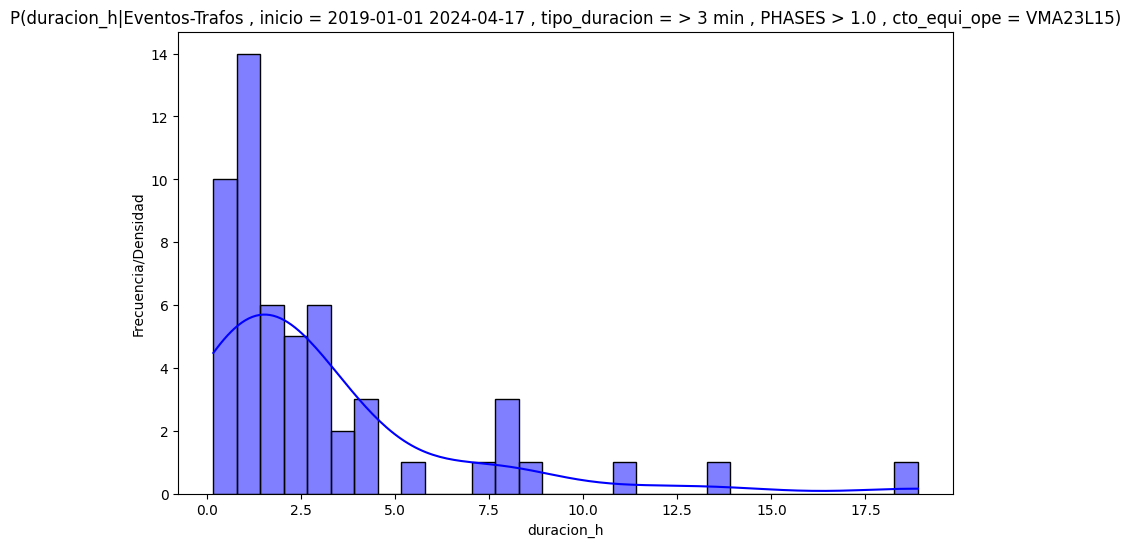

In [ ]:
# @title
dataframes = {
    'Eventos-Trafos': eventos_trafos,
    'Eventos-Switches': eventos_switches
}

sub_opciones = {
    'Eventos-Trafos': ['']+eventos_trafos_columnas,
    'Eventos-Switches': ['']+eventos_switches_columnas
}

condicionales = []
variable_objetivo = []
criterios_widgets = []
subopciones_widgets = []
filtros_widgets = []
filtro_container = None

# Función para crear el widget de filtro
def crear_widget_filtro(df, columna):
    """Crea el widget apropiado según el tipo de dato de la columna"""
    tipo_dato = df[columna].dtype

    if pd.api.types.is_object_dtype(df[columna]):
        valores_unicos = df[columna].unique().tolist()
        widget = widgets.Dropdown(
            options=valores_unicos,
            description='Valor:',
            style={'description_width': 'initial'}
        )
        return widgets.HBox([widget]), 'object'

    elif pd.api.types.is_datetime64_any_dtype(df[columna]) or isinstance(df[columna].dtype, pd.PeriodDtype):
        fecha_min = df[columna].min()
        fecha_max = df[columna].max()

        desde = widgets.DatePicker(
            description='Desde:',
            value=fecha_min,
            style={'description_width': 'initial'}
        )

        hasta = widgets.DatePicker(
            description='Hasta:',
            value=fecha_max,
            style={'description_width': 'initial'}
        )

        return widgets.HBox([desde, hasta]), 'datetime'

    elif pd.api.types.is_float_dtype(df[columna]) or pd.api.types.is_integer_dtype(df[columna]):
        valor_min = float(df[columna].min())
        valor_max = float(df[columna].max())

        operador = widgets.Dropdown(
            options=['>', '<', '>=', '<=', '==', '!='],
            description='Operador:',
            style={'description_width': 'initial'}
        )

        valor = widgets.FloatText(
            value=valor_min,
            description='Valor:',
            style={'description_width': 'initial'}
        )

        return widgets.HBox([operador, valor]), 'numeric'

    else:
        widget = widgets.Text(
            description='Valor:',
            style={'description_width': 'initial'}
        )
        return widgets.HBox([widget]), 'other'

def verificar_valores(criterios_widgets, subopciones_widgets):
    # Ya no es necesario verificar que todos los widgets tengan valor
    boton_confirmar_final.disabled = False

def on_final_button_clicked(b, criterios_widgets, subopciones_widgets, filtros_widgets, tipos_filtros):
    global configuracion_seleccionada
    configuracion_seleccionada = []

    for i in range(len(criterios_widgets)):
        criterio = criterios_widgets[i].value
        subcriterio = subopciones_widgets[i].value

        # Si el subcriterio está vacío, continuamos con la siguiente iteración
        if not subcriterio:
            continue

        filtro = filtros_widgets[i]
        tipo_filtro = tipos_filtros[i]

        filtro_config = {'criterio': criterio, 'subcriterio': subcriterio}

        if tipo_filtro == 'numeric':
            operador = filtro.children[0].children[0].value
            valor = filtro.children[0].children[1].value
            filtro_config['operador'] = operador
            filtro_config['valor'] = valor
        elif tipo_filtro == 'datetime':
            desde = filtro.children[0].children[0].value.strftime('%Y-%m-%d')
            hasta = filtro.children[0].children[1].value.strftime('%Y-%m-%d')
            filtro_config['desde'] = desde
            filtro_config['hasta'] = hasta
        elif tipo_filtro == 'object':
            valor = filtro.children[0].children[0].value
            filtro_config['valor'] = valor
        elif tipo_filtro == 'other':
            valor = filtro.children[0].children[0].value
            filtro_config['valor'] = valor

        configuracion_seleccionada.append(filtro_config)

    # Mostrar el nuevo dropdown de columnas
    mostrar_dropdown_columnas(criterios_widgets)

def mostrar_dropdown_columnas(criterios_widgets):
    global variable_objetivo
    # Crear un nuevo dropdown basado en el primer criterio
    criterio_seleccionado = criterios_widgets[0].value
    columnas_df = sub_opciones[criterio_seleccionado]

    dropdown_columnas = widgets.Dropdown(
        options=[''] + columnas_df,
        description='Variable objetivo:',
        style={'description_width': 'initial'}
    )

    boton_columnas = widgets.Button(
        description='Confirmar variable',
        disabled=False  # Ahora siempre está habilitado
    )

    # Nueva función para manejar el clic en el botón
    def on_boton_columnas_clicked(b):
        clear_output(wait=True)
        display(widgets.VBox([widgets.HBox([criterio, subopcion, filtro])
                           for criterio, subopcion, filtro in zip(criterios_widgets, subopciones_widgets, filtros_widgets)]), boton_confirmar_final, dropdown_columnas, boton_columnas)
        operadores = {
            '<': operator.lt,
            '>': operator.gt,
            '==': operator.eq,
            '<=': operator.le,
            '>=': operator.ge,
            '!=': operator.ne
        }
        global condicionales
        condicionales = []

        if not configuracion_seleccionada:  # Si no hay configuración seleccionada, salir
            return

        match configuracion_seleccionada[0]['criterio']:
          case 'Eventos-Trafos':
              eventos_filtrado = eventos_trafos
              condicionales.append(configuracion_seleccionada[0]['criterio'])
              condicionales.append(',')
              for i in range(len(configuracion_seleccionada)):
                try:
                    match type(eventos_filtrado[configuracion_seleccionada[i]['subcriterio']].dtype):
                      case np.dtypes.ObjectDType | pd.core.arrays.string_.StringDtype:
                        eventos_filtrado = eventos_filtrado[eventos_filtrado[configuracion_seleccionada[i]['subcriterio']] == configuracion_seleccionada[i]['valor']]
                        condicionales.extend([configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['valor'],','])
                      case np.dtypes.DateTime64DType | pd.core.dtypes.dtypes.PeriodDtype:
                        eventos_filtrado = eventos_filtrado[eventos_filtrado[configuracion_seleccionada[i]['subcriterio']].between(configuracion_seleccionada[i]['desde'],configuracion_seleccionada[i]['hasta'])]
                        condicionales.extend([configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['desde'][:10],configuracion_seleccionada[i]['hasta'][:10],','])
                      case np.dtypes.Float32DType:
                        eventos_filtrado = eventos_filtrado[operadores[configuracion_seleccionada[i]['operador']](eventos_filtrado[configuracion_seleccionada[i]['subcriterio']], configuracion_seleccionada[i]['valor'])]
                        condicionales.extend([configuracion_seleccionada[i]['subcriterio'],configuracion_seleccionada[i]['operador'],configuracion_seleccionada[i]['valor'],','])
                      case _:
                        continue
                except Exception as e:
                    print(f"Error al procesar el subcriterio {i + 1}: {str(e)}")
                    continue

          case 'Eventos-Switches':
              eventos_filtrado = eventos_switches
              condicionales.append(configuracion_seleccionada[0]['criterio'])
              condicionales.append(',')
              for i in range(len(configuracion_seleccionada)):
                try:
                    match type(eventos_filtrado[configuracion_seleccionada[i]['subcriterio']].dtype):
                      case np.dtypes.ObjectDType | pd.core.arrays.string_.StringDtype:
                        eventos_filtrado = eventos_filtrado[eventos_filtrado[configuracion_seleccionada[i]['subcriterio']] == configuracion_seleccionada[i]['valor']]
                        condicionales.extend([configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['valor'],','])
                      case np.dtypes.DateTime64DType | pd.core.dtypes.dtypes.PeriodDtype:
                        eventos_filtrado = eventos_filtrado[eventos_filtrado[configuracion_seleccionada[i]['subcriterio']].between(configuracion_seleccionada[i]['desde'],configuracion_seleccionada[i]['hasta'])]
                        condicionales.extend([configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['desde'][:10],configuracion_seleccionada[i]['hasta'][:10],','])
                      case np.dtypes.Float32DType:
                        eventos_filtrado = eventos_filtrado[operadores[configuracion_seleccionada[i]['operador']](eventos_filtrado[configuracion_seleccionada[i]['subcriterio']], configuracion_seleccionada[i]['valor'])]
                        condicionales.extend([configuracion_seleccionada[i]['subcriterio'],configuracion_seleccionada[i]['operador'],configuracion_seleccionada[i]['valor'],','])
                      case _:
                        continue
                except Exception as e:
                    print(f"Error al procesar el subcriterio {i + 1}: {str(e)}")
                    continue
          case _:
            print('No se encontró el tipo de criterio')

        variable_objetivo = dropdown_columnas.value
        plt.figure(figsize=(10, 6))
        sns.histplot(eventos_filtrado[dropdown_columnas.value], kde=True, color='blue', bins=30)
        plt.title(f'P({dropdown_columnas.value}|{" ".join(str(elemento) for elemento in condicionales[:-1])})')
        plt.xlabel(dropdown_columnas.value)
        plt.ylabel('Frecuencia/Densidad')
        plt.show()

    boton_columnas.on_click(on_boton_columnas_clicked)
    display(dropdown_columnas, boton_columnas)

def on_subopcion_change(change, subopcion_widget, filtro_container, index, criterios_widgets, subopciones_widgets):
    if change['new']:
        criterio_seleccionado = criterios_widgets[index].value
        subopcion_widget.options = sub_opciones[criterio_seleccionado]

        # Establecer el valor por defecto en los criterios
        for criterio in criterios_widgets:
            criterio.value = criterio_seleccionado
            criterio.disabled = True

        def actualizar_filtro(change):
            if change['new']:
                try:
                    df_1 = dataframes[criterio_seleccionado]
                    subcriterio = change['new']
                    if subcriterio in df_1.columns:
                        nuevo_filtro, tipo_filtro = crear_widget_filtro(df_1, subcriterio)
                        filtro_container.children = (nuevo_filtro,)
                        tipos_filtros[index] = tipo_filtro
                except Exception as e:
                    print(f"Error al actualizar filtro: {str(e)}")

        subopcion_widget.observe(actualizar_filtro, names='value')

# Inicializar widgets directamente con 4 criterios
def inicializar_widgets():
    global criterios_widgets
    global subopciones_widgets
    global filtros_widgets
    global filtro_container
    global tipos_filtros
    global boton_confirmar_final

    criterios_widgets = []
    subopciones_widgets = []
    filtros_widgets = []
    tipos_filtros = []

    boton_confirmar_final = widgets.Button(
        description='Confirmar criterios',
        disabled=False
    )

    for i in range(4):  # Siempre 4 criterios
        criterio = widgets.Dropdown(
            options=[''] + list(dataframes.keys()),
            description=f'Criterio {i + 1}:',
            style={'description_width': 'initial'},
        )

        subopcion = widgets.Dropdown(
            description=f'Sub-Criterio {i + 1}:',
            style={'description_width': 'initial'}
        )

        filtro_container = widgets.Box()

        criterio.observe(lambda change, criterio=criterio, subopcion=subopcion, filtro_container=filtro_container, index=i:
                        on_subopcion_change(change, subopcion, filtro_container, index, criterios_widgets, subopciones_widgets),
                        names='value')

        criterios_widgets.append(criterio)
        subopciones_widgets.append(subopcion)
        filtros_widgets.append(filtro_container)
        tipos_filtros.append(None)

    boton_confirmar_final.on_click(lambda b: on_final_button_clicked(b, criterios_widgets, subopciones_widgets, filtros_widgets, tipos_filtros))

    display(widgets.VBox([widgets.HBox([criterio, subopcion, filtro])
                           for criterio, subopcion, filtro in zip(criterios_widgets, subopciones_widgets, filtros_widgets)]))
    display(boton_confirmar_final)

# Inicializar la interfaz directamente
inicializar_widgets()

In [ ]:
configuracion_seleccionada

[{'criterio': 'Eventos-Trafos', 'subcriterio': 'MARCA*', 'valor': 'MAG'},
 {'criterio': 'Eventos-Trafos',
  'subcriterio': 'PHASES',
  'operador': '>',
  'valor': 1.0}]

#### Funcionalidad

In [ ]:
# @title
# Primer conjunto de sliders
year_slider_1 = widgets.IntSlider(
    value=date.today().year,
    min=2019,
    max=2023,
    step=1,
    description='Año 1:'
)

month_slider_1 = widgets.IntSlider(
    value=date.today().month,
    min=1,
    max=12,
    step=1,
    description='Mes 1:'
)

day_slider_1 = widgets.IntSlider(
    value=date.today().day,
    min=1,
    max=31,
    step=1,
    description='Día 1:'
)

# Segundo conjunto de sliders
year_slider_2 = widgets.IntSlider(
    value=date.today().year,
    min=2019,
    max=2023,
    step=1,
    description='Año 2:'
)

month_slider_2 = widgets.IntSlider(
    value=date.today().month,
    min=1,
    max=12,
    step=1,
    description='Mes 2:'
)

day_slider_2 = widgets.IntSlider(
    value=date.today().day,
    min=1,
    max=31,
    step=1,
    description='Día 2:'
)

# Mostrar los sliders organizados horizontalmente
slider_box_1 = widgets.VBox([year_slider_1, month_slider_1, day_slider_1])
slider_box_2 = widgets.VBox([year_slider_2, month_slider_2, day_slider_2])
display(widgets.HBox([slider_box_1, slider_box_2]))

In [ ]:
# @title
import datetime
selected_year_1 = year_slider_1.value
selected_month_1 = month_slider_1.value
selected_day_1 = day_slider_1.value
fecha_1 = datetime.date(selected_year_1, selected_month_1, selected_day_1)


selected_year_2 = year_slider_2.value
selected_month_2 = month_slider_2.value
selected_day_2 = day_slider_2.value
fecha_2 = datetime.date(selected_year_2, selected_month_2, selected_day_2)

eventos_2 = pd.read_csv('/content/drive/Shareddrives/CHEC/data_chec/datos/Data_Total/EVENTOS.csv')
eventos['inicio_1'] = pd.to_datetime(eventos_2['inicio']).dt.date
eventos['fin_1'] = pd.to_datetime(eventos_2['fin']).dt.date


fechas = eventos.inicio_1.unique()
fecha_1_1 = np.where(fechas == fecha_1)[0][0]  # [0][0] para obtener el primer índice
fecha_2_2 = np.where(fechas == fecha_2)[0][0]

# Mostrar las fechas dentro del rango
fechas_rango = fechas[fecha_1_1:fecha_2_2+1]

eventos_filtro_fecha = eventos[eventos['inicio_1'].isin(fechas_rango)]

In [ ]:
# @title
# Crear un widget Dropdown con dos opciones
tipo_equipo = widgets.Dropdown(
    options=['Trafos', 'Switches', 'Apoyos'],
    description='Elección:',
    disabled=False,
)

# Mostrar el widget
display(tipo_equipo)

Dropdown(description='Elección:', options=('Trafos', 'Switches', 'Apoyos'), value='Trafos')

In [ ]:
# @title
if tipo_equipo.value == 'Trafos':
  eventos_fecha_trafos = pd.merge(eventos_filtro_fecha, trafos, left_on=['equipo_ope','inicio_m'], right_on=['CODE','FECHA'], how='inner')
  eventos_fecha_trafos
elif tipo_equipo.value == 'Switches':
  eventos_fecha_switches = pd.merge(eventos_filtro_fecha, switches, left_on=['equipo_ope','inicio_m'], right_on=['CODE','FECHA'], how='inner')
  eventos_fecha_switches
else:
  eventos_fecha_apoyos = pd.merge(eventos_filtro_fecha, apoyos, left_on=['equipo_ope','inicio_m'], right_on=['ELNODE','FECHA'], how='inner')
  eventos_fecha_apoyos

In [ ]:
# @title
eventos_fecha_trafos_marcas = []

for marca in eventos_fecha_trafos.MARCA.unique():
  eventos_fecha_trafos_marcas.append(eventos_fecha_trafos[eventos_fecha_trafos['MARCA'] == marca])

In [ ]:
# @title
def generar_colores_aleatorios(n):
    colores = []
    for _ in range(n):
        # Generar valores RGB aleatorios
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        # Formato RGBA con opacidad de 0.5
        colores.append(f'rgba({r}, {g}, {b}, 0.5)')
    return colores

# Ejemplo de uso
n = 14  # Cambia este valor para obtener más o menos colores
colores = generar_colores_aleatorios(26)

In [ ]:
# @title
# Crear la figura
fig = go.Figure()

# Crear distplots para cada grupo y añadirlo a la figura
for marca in range(len(eventos_fecha_trafos_marcas)):
    if len(eventos_fecha_trafos_marcas[marca]['duracion_h']) != 1:
        # Obtener la distribución KDE
        kde_fig = ff.create_distplot(
            [eventos_fecha_trafos_marcas[marca]['duracion_h']],
            [eventos_fecha_trafos_marcas[marca].MARCA.unique()[0]],
            show_hist=False,
            colors=[colores[marca]],
            curve_type='kde'
        )

        # Añadir las trazas de densidad y el área bajo la curva
        for trace in kde_fig.data:
            if trace.name == eventos_fecha_trafos_marcas[marca].MARCA.unique()[0]:
                # Obtener las coordenadas x e y
                x = trace.x
                y = trace.y

                # Llenar el área bajo la curva
                fig.add_trace(go.Scatter(
                    x=x,
                    y=y,
                    fill='tozeroy',  # Rellenar hacia el eje y
                    mode='none',     # Sin puntos ni líneas visibles
                    fillcolor=colores[marca],  # Color de llenado
                    name=eventos_fecha_trafos_marcas[marca].MARCA.unique()[0],  # Nombre de la leyenda
                    opacity=0.3  # Opacidad del área
                ))
                break

# Agregar título
fig.update_layout(title_text='P(Duración interrupción|Equipo=Transformador,Fecha=(2019,1,25−28)), ∀x ∈ Marcas',
                  xaxis_title='Duración (horas)',  # Cambiar nombre del eje X
                  yaxis_title='Densidad')   # Cambiar nombre del eje Y

# Configurar el eje X a escala logarítmica
fig.update_xaxes(type='log')

# Mostrar la figura
fig.show()

In [ ]:
# @title
# Crear la figura
fig = go.Figure()

# Crear distplots para cada grupo y añadirlo a la figura
for marca in range(len(eventos_fecha_trafos_marcas)):
    if len(eventos_fecha_trafos_marcas[marca]['duracion_h']) != 1:
        # Obtener la distribución KDE
        kde_fig = ff.create_distplot(
            [eventos_fecha_trafos_marcas[marca]['duracion_h']],
            [eventos_fecha_trafos_marcas[marca].MARCA.unique()[0]],
            show_hist=False,
            colors=[colores[marca]],
            curve_type='kde'
        )

        # Añadir las trazas de densidad y el área bajo la curva
        for trace in kde_fig.data:
            if trace.name == eventos_fecha_trafos_marcas[marca].MARCA.unique()[0]:
                # Obtener las coordenadas x e y
                x = trace.x
                y = trace.y

                # Llenar el área bajo la curva
                fig.add_trace(go.Scatter(
                    x=x,
                    y=y,
                    fill='tozeroy',  # Rellenar hacia el eje y
                    mode='none',     # Sin puntos ni líneas visibles
                    fillcolor=colores[marca],  # Color de llenado
                    name=eventos_fecha_trafos_marcas[marca].MARCA.unique()[0],  # Nombre de la leyenda
                    opacity=0.3  # Opacidad del área
                ))
                break

# Agregar título
fig.update_layout(title_text='P(Duración interrupción|Equipo=Transformador,Fecha=(2019,1,25−28)), ∀x ∈ Marcas',
                  xaxis_title='Duración (horas)',  # Cambiar nombre del eje X
                  yaxis_title='Densidad')   # Cambiar nombre del eje Y

# Configurar el eje X a escala logarítmica
fig.update_xaxes(type='log')

# Mostrar la figura
fig.show()

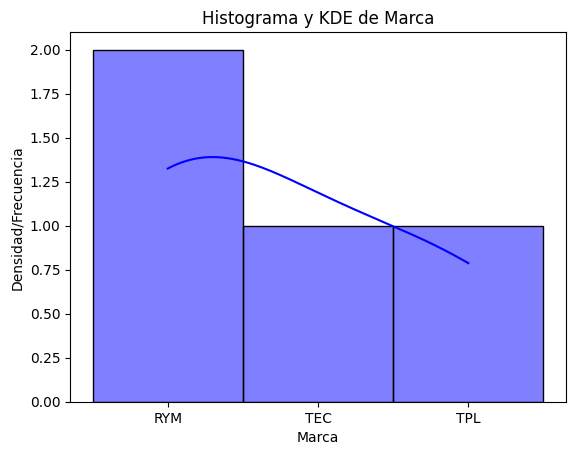

In [ ]:
sns.histplot(eventos_fecha_trafos['MARCA'], kde=True, color='blue', bins=14)
plt.title(f'Histograma y KDE de Marca')
plt.xlabel('Marca')
plt.ylabel('Densidad/Frecuencia')
plt.show()

<ipython-input-19-edfb330f3adf>:7: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-19-edfb330f3adf>:7: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



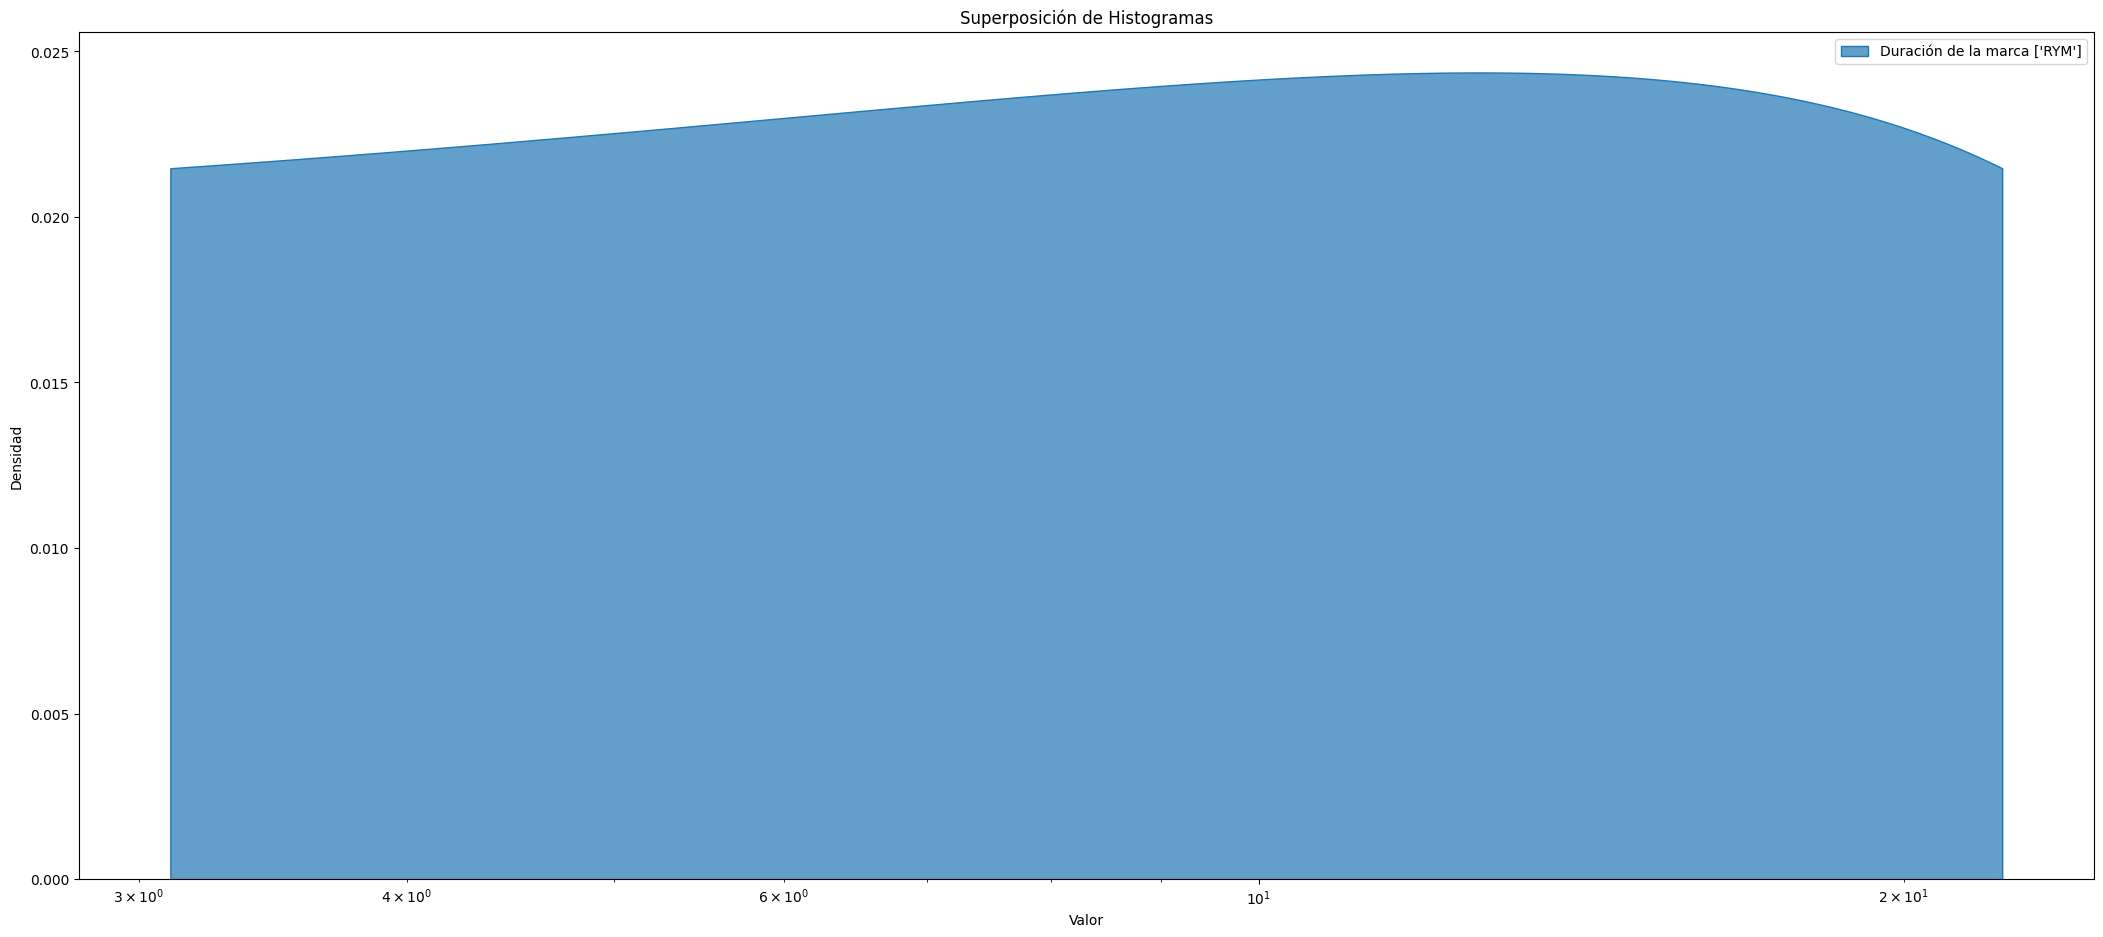

In [ ]:
# @title
# Crear el gráfico
plt.figure(figsize=(26, 11))

# Graficar los histogramas
for marca in range(len(eventos_fecha_trafos_marcas)):
  sns.kdeplot(eventos_fecha_trafos_marcas[marca]['duracion_h'], fill=True, label=f'Duración de la marca {eventos_fecha_trafos_marcas[marca].MARCA.unique()}', alpha=0.7, cut=0)

# Personalizar el gráfico
plt.title('Superposición de Histogramas')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.xscale('log')

# Mostrar el gráfico
plt.show()

IntSlider(value=2, description='Número de Criterios:', max=4, min=1, style=SliderStyle(description_width='init…

Button(description='Confirmar cantidad', style=ButtonStyle())

Button(description='Confirmar criterios', style=ButtonStyle())

Dropdown(description='Variable objetivo:', index=14, options=('', '', 'evento', 'equipo_ope', 'cto_equi_ope', …

Button(description='Confirmar variable', style=ButtonStyle())

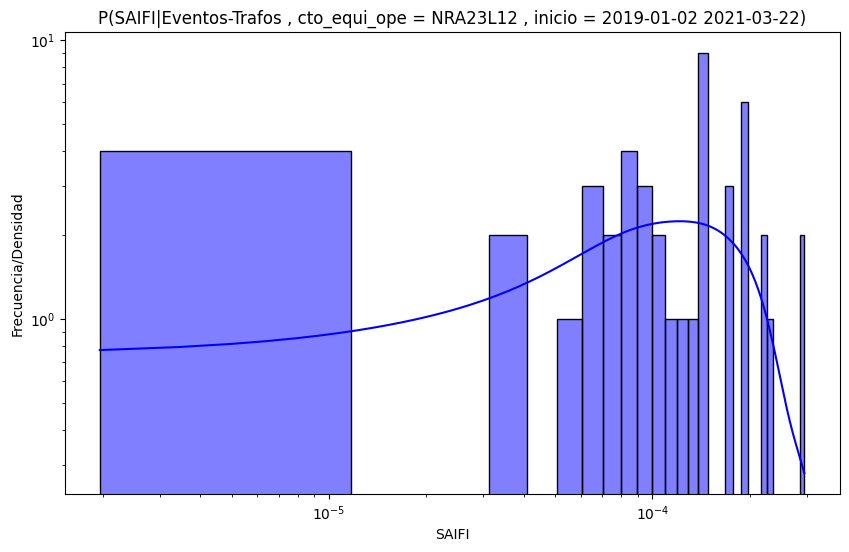

In [ ]:
# @title
# Simulación de un DataFrame de ejemplo
dataframes = {
    'Eventos-Trafos': eventos_trafos,
    'Eventos-Switches': eventos_switches
}

sub_opciones = {
    'Eventos-Trafos': ['']+eventos_trafos_columnas,
    'Eventos-Switches': ['']+eventos_switches_columnas
}

condicionales = []

variable_objetivo = []

criterios_widgets = []
subopciones_widgets = []
filtros_widgets = []
filtro_container = None


# Función para crear el widget de filtro
def crear_widget_filtro(df, columna):
    """Crea el widget apropiado según el tipo de dato de la columna"""
    tipo_dato = df[columna].dtype

    if pd.api.types.is_object_dtype(df[columna]):
        valores_unicos = df[columna].unique().tolist()
        widget = widgets.Dropdown(
            options=valores_unicos,
            description='Valor:',
            style={'description_width': 'initial'}
        )
        return widgets.HBox([widget]), 'object'

    elif pd.api.types.is_datetime64_any_dtype(df[columna]) or isinstance(df[columna].dtype, pd.PeriodDtype):
        fecha_min = df[columna].min()
        fecha_max = df[columna].max()

        desde = widgets.DatePicker(
            description='Desde:',
            value=fecha_min,
            style={'description_width': 'initial'}
        )

        hasta = widgets.DatePicker(
            description='Hasta:',
            value=fecha_max,
            style={'description_width': 'initial'}
        )

        return widgets.HBox([desde, hasta]), 'datetime'

    elif pd.api.types.is_float_dtype(df[columna]) or pd.api.types.is_integer_dtype(df[columna]):
        valor_min = float(df[columna].min())
        valor_max = float(df[columna].max())

        operador = widgets.Dropdown(
            options=['>', '<', '>=', '<=', '==', '!='],
            description='Operador:',
            style={'description_width': 'initial'}
        )

        valor = widgets.FloatText(
            value=valor_min,
            description='Valor:',
            style={'description_width': 'initial'}
        )

        return widgets.HBox([operador, valor]), 'numeric'

    else:
        widget = widgets.Text(
            description='Valor:',
            style={'description_width': 'initial'}
        )
        return widgets.HBox([widget]), 'other'

def verificar_valores(criterios_widgets, subopciones_widgets):
    criterios_validos = all(criterio.value != '' for criterio in criterios_widgets)
    subopciones_validas = all(len(subopcion.options) > 0 and subopcion.value is not None
                               for subopcion in subopciones_widgets)
    boton_confirmar_final.disabled = not (criterios_validos and subopciones_validas)

def on_final_button_clicked(b, criterios_widgets, subopciones_widgets, filtros_widgets, tipos_filtros):
    global configuracion_seleccionada
    configuracion_seleccionada = []

    for i in range(len(criterios_widgets)):
        criterio = criterios_widgets[i].value
        subcriterio = subopciones_widgets[i].value
        filtro = filtros_widgets[i]
        tipo_filtro = tipos_filtros[i]

        filtro_config = {'criterio': criterio, 'subcriterio': subcriterio}

        if tipo_filtro == 'numeric':
            operador = filtro.children[0].children[0].value
            valor = filtro.children[0].children[1].value
            filtro_config['operador'] = operador
            filtro_config['valor'] = valor
        elif tipo_filtro == 'datetime':
            desde = filtro.children[0].children[0].value.strftime('%Y-%m-%d')
            hasta = filtro.children[0].children[1].value.strftime('%Y-%m-%d')
            filtro_config['desde'] = desde
            filtro_config['hasta'] = hasta
        elif tipo_filtro == 'object':
            valor = filtro.children[0].children[0].value
            filtro_config['valor'] = valor
        elif tipo_filtro == 'other':
            valor = filtro.children[0].children[0].value
            filtro_config['valor'] = valor

        configuracion_seleccionada.append(filtro_config)

    # Mostrar el nuevo dropdown de columnas
    mostrar_dropdown_columnas(criterios_widgets)

def mostrar_dropdown_columnas(criterios_widgets):
    global variable_objetivo
    # Crear un nuevo dropdown basado en el primer criterio
    criterio_seleccionado = criterios_widgets[0].value
    columnas_df = sub_opciones[criterio_seleccionado]

    dropdown_columnas = widgets.Dropdown(
        options=[''] + columnas_df,
        description='Variable objetivo:',
        style={'description_width': 'initial'}
    )

    boton_columnas = widgets.Button(
        description='Confirmar variable',
        disabled=True
    )

    def verificar_columna(change):
        boton_columnas.disabled = change['new'] == ''

    # Nueva función para manejar el clic en el botón
    def on_boton_columnas_clicked(b):
        clear_output(wait=True)
        display(num_criterios, boton_confirmar, widgets.VBox([widgets.HBox([criterio, subopcion, filtro])
                           for criterio, subopcion, filtro in zip(criterios_widgets, subopciones_widgets, filtros_widgets)]), boton_confirmar_final, dropdown_columnas, boton_columnas)
        operadores = {
            '<': operator.lt,
            '>': operator.gt,
            '==': operator.eq,
            '<=': operator.le,
            '>=': operator.ge,
            '!=': operator.ne
        }
        global condicionales
        condicionales = []
        match configuracion_seleccionada[0]['criterio']:

          case 'Eventos-Trafos':
              eventos_filtrado = eventos_trafos
              condicionales.append(configuracion_seleccionada[0]['criterio'])
              condicionales.append(',')
              for i in range(len(configuracion_seleccionada)):
                match type(eventos_filtrado[configuracion_seleccionada[i]['subcriterio']].dtype):
                  case np.dtypes.ObjectDType | pd.core.arrays.string_.StringDtype:
                    eventos_filtrado = eventos_filtrado[eventos_filtrado[configuracion_seleccionada[i]['subcriterio']] == configuracion_seleccionada[i]['valor']]
                    condicionales.extend([configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['valor'],','])
                  case np.dtypes.DateTime64DType | pd.core.dtypes.dtypes.PeriodDtype:
                    eventos_filtrado = eventos_filtrado[eventos_filtrado[configuracion_seleccionada[i]['subcriterio']].between(configuracion_seleccionada[i]['desde'],configuracion_seleccionada[i]['hasta'])]
                    condicionales.extend([configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['desde'][:10],configuracion_seleccionada[i]['hasta'][:10],','])
                  case np.dtypes.Float32DType:
                    eventos_filtrado = eventos_filtrado[operadores[configuracion_seleccionada[i]['operador']](eventos_filtrado[configuracion_seleccionada[i]['subcriterio']], configuracion_seleccionada[i]['valor'])]
                    condicionales.extend([configuracion_seleccionada[i]['subcriterio'],configuracion_seleccionada[i]['operador'],configuracion_seleccionada[i]['valor'],','])
                  case _:
                    print('No se encontró el tipo de subcriterio')
          case 'Eventos-Switches':
              eventos_filtrado = eventos_switches
              condicionales.append(configuracion_seleccionada[0]['criterio'])
              condicionales.append(',')
              for i in range(len(configuracion_seleccionada)):
                match type(eventos_filtrado[configuracion_seleccionada[i]['subcriterio']].dtype):
                  case np.dtypes.ObjectDType | pd.core.arrays.string_.StringDtype:
                    eventos_filtrado = eventos_filtrado[eventos_filtrado[configuracion_seleccionada[i]['subcriterio']] == configuracion_seleccionada[i]['valor']]
                    condicionales.extend([configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['valor'],','])
                  case np.dtypes.DateTime64DType | pd.core.dtypes.dtypes.PeriodDtype:
                    eventos_filtrado = eventos_filtrado[eventos_filtrado[configuracion_seleccionada[i]['subcriterio']].between(configuracion_seleccionada[i]['desde'],configuracion_seleccionada[i]['hasta'])]
                    condicionales.extend([configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['desde'][:10],configuracion_seleccionada[i]['hasta'][:10],','])
                  case np.dtypes.Float32DType:
                    eventos_filtrado = eventos_filtrado[operadores[configuracion_seleccionada[i]['operador']](eventos_filtrado[configuracion_seleccionada[i]['subcriterio']], configuracion_seleccionada[i]['valor'])]
                    condicionales.extend([configuracion_seleccionada[i]['subcriterio'],configuracion_seleccionada[i]['operador'],configuracion_seleccionada[i]['valor'],','])
                  case _:
                    print('No se encontró el tipo de subcriterio')
          case _:
            print('No se encontró el tipo de criterio')

        variable_objetivo = dropdown_columnas.value
        plt.figure(figsize=(10, 6))
        sns.histplot(eventos_filtrado[dropdown_columnas.value], kde=True, color='blue', bins=30)
        plt.title(f'P({dropdown_columnas.value}|{" ".join(str(elemento) for elemento in condicionales[:-1])})')
        plt.xlabel(dropdown_columnas.value)
        plt.xscale('log')
        plt.yscale('log')
        plt.ylabel('Frecuencia/Densidad')
        plt.show()


    dropdown_columnas.observe(verificar_columna, names='value')
    boton_columnas.on_click(on_boton_columnas_clicked)  # Conecta el evento de clic al botón

    # Mostrar el dropdown y el botón
    display(dropdown_columnas, boton_columnas)

def on_subopcion_change(change, subopcion_widget, filtro_container, index, criterios_widgets, subopciones_widgets):
    if change['new']:
        criterio_seleccionado = criterios_widgets[index].value
        subopcion_widget.options = sub_opciones[criterio_seleccionado]

        # Establecer el valor por defecto en los criterios
        for criterio in criterios_widgets:
            criterio.value = criterio_seleccionado
            criterio.disabled = True  # Deshabilitar el criterio

        def actualizar_filtro(change):
            if change['new']:
                df_1 = dataframes[criterio_seleccionado]
                subcriterio = change['new']
                if subcriterio in df_1.columns:
                    nuevo_filtro, tipo_filtro = crear_widget_filtro(df_1, subcriterio)
                    filtro_container.children = (nuevo_filtro,)
                    tipos_filtros[index] = tipo_filtro
                    verificar_valores(criterios_widgets, subopciones_widgets)

        subopcion_widget.observe(actualizar_filtro, names='value')

    verificar_valores(criterios_widgets, subopciones_widgets)

def seleccionar_criterios(n):
    clear_output(wait=True)
    display(num_criterios, boton_confirmar)
    global criterios_widgets
    global subopciones_widgets
    global filtros_widgets
    global filtro_container
    criterios_widgets = []
    subopciones_widgets = []
    filtros_widgets = []
    global tipos_filtros
    tipos_filtros = []

    # Crear el botón de confirmación final
    global boton_confirmar_final
    boton_confirmar_final = widgets.Button(
        description='Confirmar criterios',
        disabled=True
    )

    for i in range(n):
        criterio = widgets.Dropdown(
            options=[''] + list(dataframes.keys()),
            description=f'Criterio {i + 1}:',
            style={'description_width': 'initial'},
        )

        subopcion = widgets.Dropdown(
            description=f'Sub-Criterio {i + 1}:',
            style={'description_width': 'initial'}
        )

        filtro_container = widgets.Box()

        criterio.observe(lambda change, criterio=criterio, subopcion=subopcion, filtro_container=filtro_container, index=i: on_subopcion_change(change, subopcion, filtro_container, index, criterios_widgets, subopciones_widgets), names='value')

        subopcion.observe(lambda x: verificar_valores(criterios_widgets, subopciones_widgets), names='value')

        criterios_widgets.append(criterio)
        subopciones_widgets.append(subopcion)
        filtros_widgets.append(filtro_container)
        tipos_filtros.append(None)

    boton_confirmar_final.on_click(lambda b: on_final_button_clicked(b, criterios_widgets, subopciones_widgets, filtros_widgets, tipos_filtros))

    display(widgets.VBox([widgets.HBox([criterio, subopcion, filtro])
                           for criterio, subopcion, filtro in zip(criterios_widgets, subopciones_widgets, filtros_widgets)]))
    display(boton_confirmar_final)

# Crear el widget para seleccionar el número de criterios
num_criterios = widgets.IntSlider(
    value=1,
    min=1,
    max=4,
    step=1,
    description='Número de Criterios:',
    style={'description_width': 'initial'}
)

# Botón para confirmar la selección del número de criterios
boton_confirmar = widgets.Button(description='Confirmar cantidad', disabled=False)
boton_confirmar.on_click(lambda b: seleccionar_criterios(num_criterios.value))

# Mostrar el slider y el botón inicial
display(num_criterios, boton_confirmar)

#### Sección de selección

In [ ]:
# @title


# Diccionario de DataFrames (asumiendo que ya existen)
dataframes = {
    'Eventos': eventos,
    'Trafos': trafos,
    'Switches': switches
}


configuracion_seleccionada = []
tipos_filtros = []

# Opciones y sub-opciones
sub_opciones = {
    '': [],  # Opción vacía al inicio
    'Eventos': eventos_columnas,
    'Trafos': trafos_columnas,
    'Switches': switches_columnas,
}

condicionales = []

def crear_widget_filtro(df, columna):
    """Crea el widget apropiado según el tipo de dato de la columna"""
    tipo_dato = df[columna].dtype

    if pd.api.types.is_object_dtype(df[columna]):
        valores_unicos = df[columna].unique().tolist()
        widget = widgets.Dropdown(
            options=valores_unicos,
            description='Valor:',
            style={'description_width': 'initial'}
        )
        return widgets.HBox([widget]), 'object'

    elif pd.api.types.is_datetime64_any_dtype(df[columna]) or isinstance(df[columna].dtype, pd.PeriodDtype):
        fecha_min = df[columna].min()
        fecha_max = df[columna].max()

        desde = widgets.DatePicker(
            description='Desde:',
            value=fecha_min,
            style={'description_width': 'initial'}
        )

        hasta = widgets.DatePicker(
            description='Hasta:',
            value=fecha_max,
            style={'description_width': 'initial'}
        )

        return widgets.HBox([desde, hasta]), 'datetime'

    elif pd.api.types.is_float_dtype(df[columna]) or pd.api.types.is_integer_dtype(df[columna]):
        valor_min = float(df[columna].min())
        valor_max = float(df[columna].max())

        operador = widgets.Dropdown(
            options=['>', '<', '>=', '<=', '==', '!='],
            description='Operador:',
            style={'description_width': 'initial'}
        )

        valor = widgets.FloatText(
            value=valor_min,
            description='Valor:',
            style={'description_width': 'initial'}
        )

        return widgets.HBox([operador, valor]), 'numeric'

    else:
        widget = widgets.Text(
            description='Valor:',
            style={'description_width': 'initial'}
        )
        return widgets.HBox([widget]), 'other'


def seleccionar_criterios(n):
    clear_output(wait=True)
    display(num_criterios, boton_confirmar)
    criterios_widgets = []
    subopciones_widgets = []
    filtros_widgets = []
    global tipos_filtros
    tipos_filtros = []  # Nueva lista para guardar los tipos de filtros

    # Crear el botón de confirmación final
    boton_confirmar_final = widgets.Button(
        description='Confirmar criterios',
        disabled=True
    )

    def verificar_valores(*args):
        criterios_validos = all(criterio.value != '' for criterio in criterios_widgets)
        subopciones_validas = all(len(subopcion.options) > 0 and subopcion.value is not None
                                   for subopcion in subopciones_widgets)
        boton_confirmar_final.disabled = not (criterios_validos and subopciones_validas)

    def on_final_button_clicked(b):
        global configuracion_seleccionada
        configuracion_seleccionada = []  # Reiniciar configuración

        for i in range(len(criterios_widgets)):
            criterio = criterios_widgets[i].value
            subcriterio = subopciones_widgets[i].value
            filtro = filtros_widgets[i]
            tipo_filtro = tipos_filtros[i]

            filtro_config = {'criterio': criterio, 'subcriterio': subcriterio}

            # Guardar el valor del filtro según su tipo
            if tipo_filtro == 'numeric':
                operador = filtro.children[0].children[0].value  # Dropdown del operador
                valor = filtro.children[0].children[1].value  # FloatText del valor
                filtro_config['operador'] = operador
                filtro_config['valor'] = valor
            elif tipo_filtro == 'datetime':
                desde = datetime.combine(filtro.children[0].children[0].value, datetime.min.time()).strftime('%Y-%m-%d %H:%M:%S')
                hasta = datetime.combine(filtro.children[0].children[1].value, datetime.min.time()).strftime('%Y-%m-%d %H:%M:%S')
                filtro_config['desde'] = desde
                filtro_config['hasta'] = hasta
            elif tipo_filtro == 'object':
                valor = filtro.children[0].children[0].value  # Dropdown de valores únicos
                filtro_config['valor'] = valor
            elif tipo_filtro == 'other':
                if isinstance(filtro.children[0], widgets.Text):
                    valor = filtro.children[0].value  # Text widget
                    filtro_config['valor'] = valor

            configuracion_seleccionada.append(filtro_config)


    for i in range(n):
        # Crear dropdown para cada criterio
        criterio = widgets.Dropdown(
            options=[''] + list(dataframes.keys()),
            description=f'Criterio {i + 1}:',
            style={'description_width': 'initial'}
        )

        # Crear un widget para las sub-opciones
        subopcion = widgets.Dropdown(
            description=f'Sub-Criterio {i + 1}:',
            style={'description_width': 'initial'}
        )

        # Contenedor para el widget de filtro
        filtro_container = widgets.Box()

        # Función para actualizar sub-opciones y filtro según la selección
        def actualizar_widgets(change, subopcion_widget=subopcion, filtro_container=filtro_container, index=i):
            if change['new']:

                criterio_seleccionado = change['new']


                # Abrir el archivo en modo escritura ('w') y guardar el valor
                with open("seleccion.txt", "w") as archivo:
                    archivo.write(criterio_seleccionado)

                subopcion_widget.options = sub_opciones[criterio_seleccionado]

                # Actualizar el filtro cuando se selecciona una sub-opción
                def actualizar_filtro(change):
                    global tipos_filtros
                    if change['new']:

                        # Abre el archivo en modo 'lectura'
                        with open("seleccion.txt", "r") as archivo:
                            contenido = archivo.read()  # Lee todo el contenido del archivo

                        df_1 = dataframes[contenido]
                        subcriterio = change['new']

                        # Verificar que el subcriterio pertenece al dataframe correcto
                        if subcriterio in df_1.columns:
                            nuevo_filtro, tipo_filtro = crear_widget_filtro(df_1, subcriterio)
                            filtro_container.children = (nuevo_filtro,)
                            tipos_filtros[index] = tipo_filtro  # Actualizar el tipo de filtro
                            verificar_valores()
                        else:
                            print(f"El subcriterio '{subcriterio}' no pertenece al dataframe '{contenido}'.")

                subopcion_widget.observe(actualizar_filtro, names='value')

            verificar_valores()

        criterio.observe(actualizar_widgets, names='value')
        subopcion.observe(lambda x: verificar_valores(), names='value')

        # Agregar widgets a las listas
        criterios_widgets.append(criterio)
        subopciones_widgets.append(subopcion)
        filtros_widgets.append(filtro_container)
        tipos_filtros.append(None)  # Inicialmente no hay tipo de filtro

    # Conectar el botón final
    boton_confirmar_final.on_click(on_final_button_clicked)

    # Mostrar todos los widgets
    display(widgets.VBox([widgets.HBox([criterio, subopcion, filtro])
                           for criterio, subopcion, filtro in zip(criterios_widgets, subopciones_widgets, filtros_widgets)]))
    display(boton_confirmar_final)

# Crear el widget para seleccionar el número de criterios
num_criterios = widgets.IntSlider(
    value=1,
    min=1,
    max=4,
    step=1,
    description='Número de Criterios:',
    style={'description_width': 'initial'}
)

# Botón para confirmar la selección del número de criterios
boton_confirmar = widgets.Button(description='Confirmar cantidad')
boton_confirmar.on_click(lambda b: seleccionar_criterios(num_criterios.value))

# Mostrar el slider y el botón inicial
display(num_criterios, boton_confirmar)

IntSlider(value=3, description='Número de Criterios:', max=4, min=1, style=SliderStyle(description_width='init…

Button(description='Confirmar cantidad', style=ButtonStyle())

Button(description='Confirmar criterios', disabled=True, style=ButtonStyle())

Dropdown(description='Columna:', index=24, options=('evento', 'equipo_ope', 'tipo_equi_ope', 'cto_equi_ope', '…

Button(button_style='success', description='Confirmar', style=ButtonStyle())

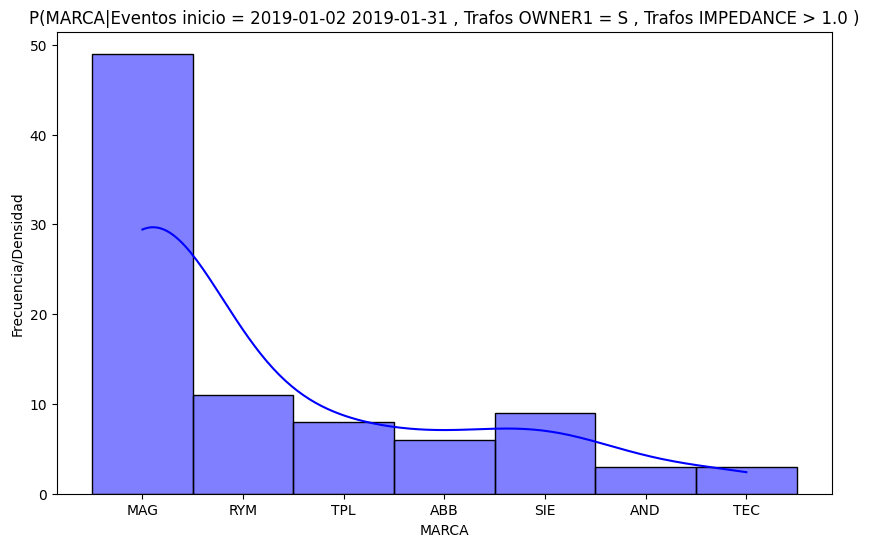

In [ ]:
# @title
eventos_filtrado = eventos
apoyos_filtrado = apoyos
trafos_filtrado = trafos
switches_filtrado = switches

criterios_list = []
condicionales = []

operadores = {
    '<': operator.lt,
    '>': operator.gt,
    '==': operator.eq,
    '<=': operator.le,
    '>=': operator.ge,
    '!=': operator.ne
}

for i in range(len(configuracion_seleccionada)):
  match configuracion_seleccionada[i]['criterio']:
    case 'Eventos':
      match tipos_filtros[i]:
        case 'datetime':
          eventos_filtrado = eventos_filtrado[eventos_filtrado[configuracion_seleccionada[i]['subcriterio']].between(configuracion_seleccionada[i]['desde'],configuracion_seleccionada[i]['hasta'])]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['desde'][:10],configuracion_seleccionada[i]['hasta'][:10],','])
        case 'object':
          eventos_filtrado = eventos_filtrado[eventos_filtrado[configuracion_seleccionada[i]['subcriterio']] == configuracion_seleccionada[i]['valor']]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['valor'],','])
        case 'numeric':
          eventos_filtrado = eventos_filtrado[operadores[configuracion_seleccionada[i]['operador']](eventos_filtrado[configuracion_seleccionada[i]['subcriterio']], configuracion_seleccionada[i]['valor'])]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],configuracion_seleccionada[i]['operador'],configuracion_seleccionada[i]['valor'],','])
        case _:
          print('No se encontró el tipo de subcriterio')
    case 'Apoyos':
      criterios_list.append(configuracion_seleccionada[i]['criterio'])
      match tipos_filtros[i]:
        case 'datetime':
          apoyos_filtrado = apoyos_filtrado[apoyos_filtrado[configuracion_seleccionada[i]['subcriterio']].between(configuracion_seleccionada[i]['desde'][:7],configuracion_seleccionada[i]['hasta'][:7])]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['desde'][:10],configuracion_seleccionada[i]['hasta'][:10],','])
        case 'object':
          apoyos_filtrado = apoyos_filtrado[apoyos_filtrado[configuracion_seleccionada[i]['subcriterio']] == configuracion_seleccionada[i]['valor']]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['valor'],','])
        case 'numeric':
          apoyos_filtrado = apoyos_filtrado[operadores[configuracion_seleccionada[i]['operador']](apoyos_filtrado[configuracion_seleccionada[i]['subcriterio']], configuracion_seleccionada[i]['valor'])]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],configuracion_seleccionada[i]['operador'],configuracion_seleccionada[i]['valor'],','])
        case _:
          print('No se encontró el tipo de subcriterio')
    case 'Trafos':
      criterios_list.append(configuracion_seleccionada[i]['criterio'])
      match tipos_filtros[i]:
        case 'datetime':
          trafos_filtrado = trafos_filtrado[trafos_filtrado[configuracion_seleccionada[i]['subcriterio']].between(configuracion_seleccionada[i]['desde'][:7],configuracion_seleccionada[i]['hasta'][:7])]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['desde'][:10],configuracion_seleccionada[i]['hasta'][:10],','])
        case 'object':
          trafos_filtrado = trafos_filtrado[trafos_filtrado[configuracion_seleccionada[i]['subcriterio']] == configuracion_seleccionada[i]['valor']]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['valor'],','])
        case 'numeric':
          trafos_filtrado = trafos_filtrado[operadores[configuracion_seleccionada[i]['operador']](trafos_filtrado[configuracion_seleccionada[i]['subcriterio']], configuracion_seleccionada[i]['valor'])]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],configuracion_seleccionada[i]['operador'],configuracion_seleccionada[i]['valor'],','])
        case _:
          print('No se encontró el tipo de subcriterio')
    case 'Switches':
      criterios_list.append(configuracion_seleccionada[i]['criterio'])
      match tipos_filtros[i]:
        case 'datetime':
          switches_filtrado = switches_filtrado[switches_filtrado[configuracion_seleccionada[i]['subcriterio']].between(configuracion_seleccionada[i]['desde'][:7],configuracion_seleccionada[i]['hasta'][:7])]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['desde'][:10],configuracion_seleccionada[i]['hasta'][:10],','])
        case 'object':
          switches_filtrado = switches_filtrado[switches_filtrado[configuracion_seleccionada[i]['subcriterio']] == configuracion_seleccionada[i]['valor']]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],'=',configuracion_seleccionada[i]['valor'],','])
        case 'numeric':
          switches_filtrado = switches_filtrado[operadores[configuracion_seleccionada[i]['operador']](switches_filtrado[configuracion_seleccionada[i]['subcriterio']], configuracion_seleccionada[i]['valor'])]
          condicionales.extend([configuracion_seleccionada[i]['criterio'],configuracion_seleccionada[i]['subcriterio'],configuracion_seleccionada[i]['operador'],configuracion_seleccionada[i]['valor'],','])
        case _:
          print('No se encontró el tipo de subcriterio')
    case _:
      print('No se encontró el criterio')

condicionales = " ".join(str(elemento) for elemento in condicionales)

for criterios in list(set(criterios_list)):
    match criterios:
        case 'Apoyos':
            eventos_filtrado = pd.merge(eventos_filtrado, apoyos_filtrado, left_on=['equipo_ope', 'inicio_m'], right_on=['ELNODE', 'FECHA'], how='inner')
        case 'Trafos':
            eventos_filtrado = pd.merge(eventos_filtrado, trafos_filtrado, left_on=['equipo_ope', 'inicio_m'], right_on=['CODE', 'FECHA'], how='inner')
        case 'Switches':
            eventos_filtrado = pd.merge(eventos_filtrado, switches_filtrado, left_on=['equipo_ope', 'inicio_m'], right_on=['CODE', 'FECHA'], how='inner')


# Crear el Dropdown con las columnas de eventos_filtrados
dropdown_columnas = widgets.Dropdown(
    options=eventos_filtrado.columns,  # Las opciones son las columnas de eventos_filtrados
    description='Columna:',
    disabled=False
)

# Crear el botón de confirmación, inicialmente deshabilitado
boton_confirmar = widgets.Button(
    description='Confirmar',
    disabled=True,
    button_style='success'  # Botón de color verde
)

# Variable para guardar la selección
columna_seleccionada = None

# Función que habilita el botón cuando se selecciona una opción
def on_dropdown_change(change):
    if change['new']:
        boton_confirmar.disabled = False

# Función que guarda la selección y muestra la gráfica cuando se presiona el botón
def on_button_click(b):
    clear_output(wait=True)
    global columna_seleccionada
    columna_seleccionada = dropdown_columnas.value
    display(dropdown_columnas)
    display(boton_confirmar)
    # Generar y mostrar la gráfica
    plt.figure(figsize=(10, 6))
    sns.histplot(eventos_filtrado[columna_seleccionada], kde=True, color='blue', bins=30)
    plt.title(f'P({columna_seleccionada}|{condicionales[:-1]})')
    plt.xlabel(columna_seleccionada)
    plt.ylabel('Frecuencia/Densidad')
    plt.show()

# Conectar las funciones de cambio y clic
dropdown_columnas.observe(on_dropdown_change, names='value')
boton_confirmar.on_click(on_button_click)

# Mostrar el dropdown y el botón
display(dropdown_columnas)
display(boton_confirmar)

In [ ]:
eventos_filtrado

,evento,equipo_ope,tipo_equi_ope,cto_equi_ope,tipo_elemento,inicio,fin,duracion_h,tipo_duracion,causa,tipo_causa,CNT_TRAFOS_AFEC,cnt_usus,SAIDI,SAIFI,inicio_m,fin_m
0,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01,2019-01-01,1.030000,> 3 min,37.0,NP,1.0,1.0,0.000002,0.000002,2019-01,2019-01
1,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01,2019-01-01,1.159722,> 3 min,37.0,NP,32.0,325.0,0.000757,0.000653,2019-01,2019-01
2,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01,2019-01-01,1.305556,> 3 min,37.0,NP,54.0,3015.0,0.007904,0.006054,2019-01,2019-01
3,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01,2019-01-01,2.683056,> 3 min,37.0,NP,209.0,2498.0,0.013459,0.005016,2019-01,2019-01
4,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01,2019-01-01,13.373333,> 3 min,37.0,NP,1.0,3.0,0.000081,0.000006,2019-01,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189633,8272934,C12639,interruptor,VMA23L16,13.2,2024-06-30,2024-06-30,2.286944,> 3 min,30.0,NP,44.0,129.0,0.000521,0.000228,2024-06,2024-06
189634,8272936,M24083,interruptor,VMA23L15,13.2,2024-06-30,2024-06-30,1.635556,> 3 min,29.0,NP,6.0,346.0,0.001000,0.000611,2024-06,2024-06
189636,8272942,VBO23L14,interruptor,VBO23L14,13.2,2024-06-30,2024-06-30,0.030278,<= 3 min,30.0,NP,168.0,2213.0,0.000118,0.003909,2024-06,2024-06
189637,8272942,VBO23L14,interruptor,VBO23L14,13.2,2024-06-30,2024-06-30,0.035556,<= 3 min,30.0,NP,23.0,258.0,0.000016,0.000456,2024-06,2024-06
